In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('../../Porter_NN.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [81]:
df.shape

(175777, 14)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [83]:
# Making sure of datatype as datetime.
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Making the target column.
df['delivery_time_seconds'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

In [84]:
df['delivery_time_seconds'].head()

0    2820.0
1    2640.0
2    3300.0
3    3540.0
4    2760.0
Name: delivery_time_seconds, dtype: float64

In [85]:
df['order_day'] = df['created_at'].dt.dayofweek
df['order_hour'] = df['created_at'].dt.hour
df['order_date'] = df['created_at'].dt.day

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_day,order_hour,order_date
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,2820.0,4,22,6
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,2640.0,1,21,10
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,3300.0,0,0,16
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3540.0,3,3,12
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2760.0,1,2,27


<Axes: xlabel='delivery_time_seconds', ylabel='Count'>

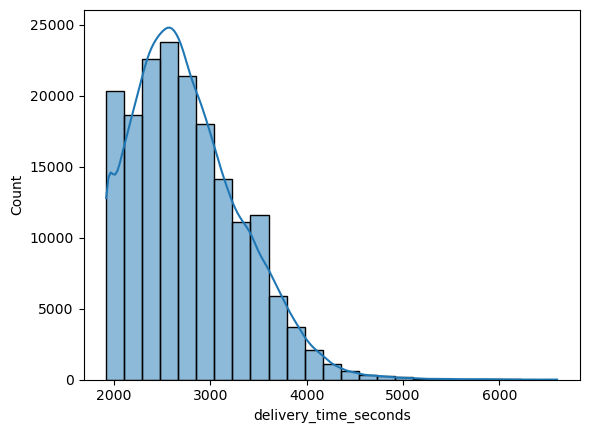

In [86]:
sns.histplot(df['delivery_time_seconds'], bins=25, kde=True)

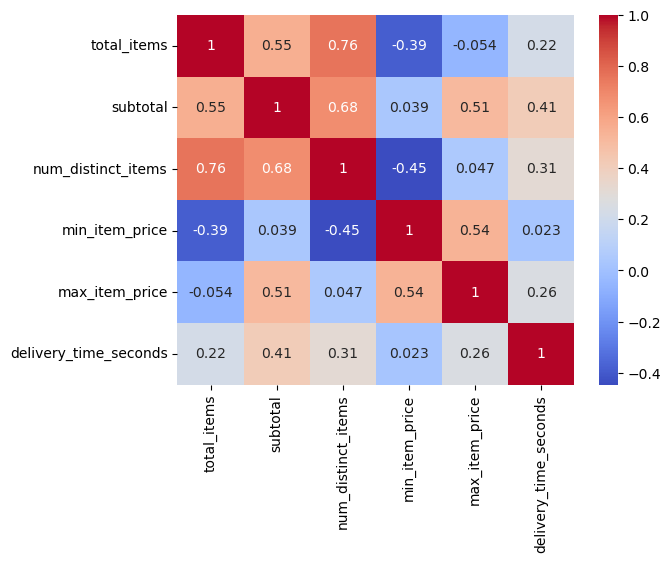

In [87]:
item_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'delivery_time_seconds']
sns.heatmap(df[item_features].corr(), annot=True, cmap='coolwarm')
plt.show()

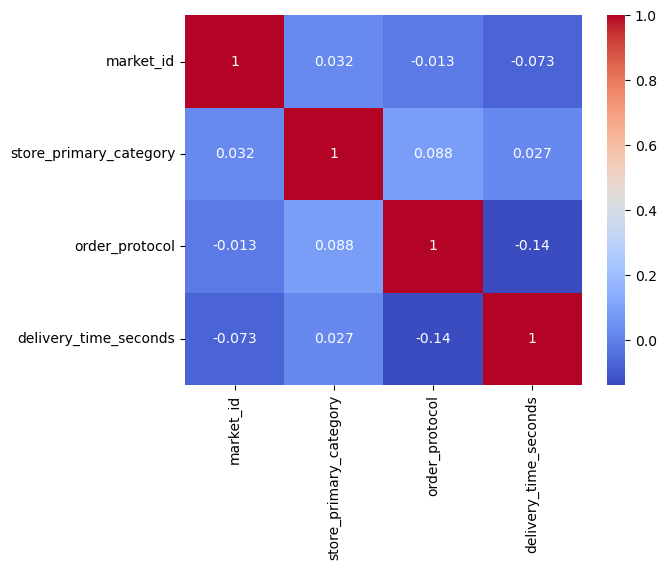

In [88]:
store_features = ['market_id', 'store_primary_category', 'order_protocol', 'delivery_time_seconds']
sns.heatmap(df[store_features].corr(), annot=True, cmap='coolwarm')
plt.show()

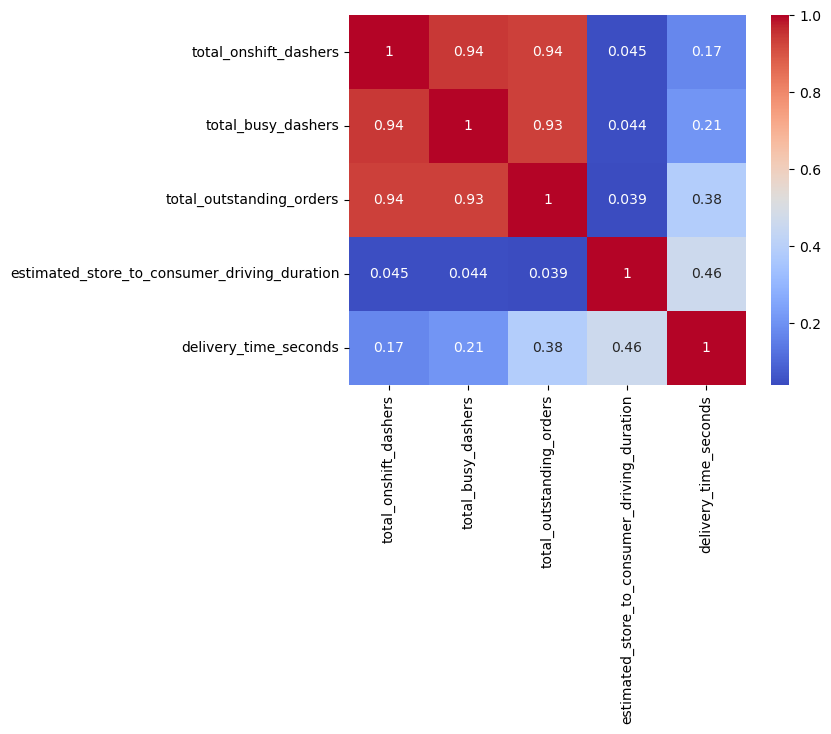

In [89]:
order_features = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration', 'delivery_time_seconds']
sns.heatmap(df[order_features].corr(), annot=True, cmap='coolwarm')
plt.show()

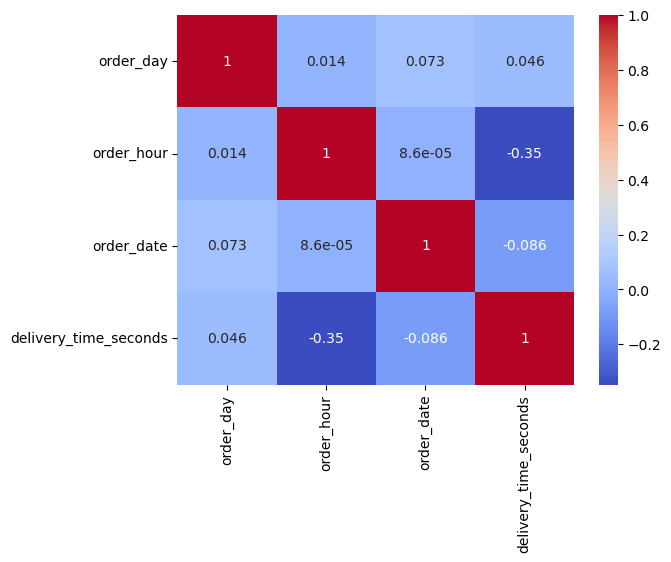

In [90]:
day_features = ['order_day', 'order_hour', 'order_date', 'delivery_time_seconds']
sns.heatmap(df[day_features].corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

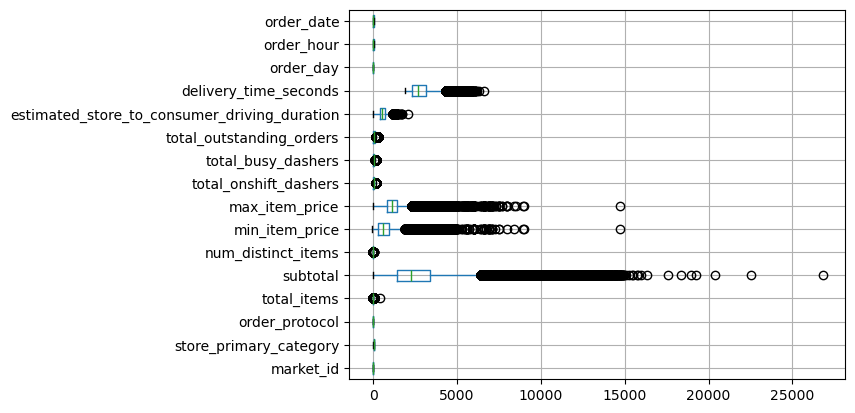

In [91]:
df.boxplot(vert=False)

In [92]:
y = df['delivery_time_seconds']
y

0         2820.0
1         2640.0
2         3300.0
3         3540.0
4         2760.0
           ...  
175772    2580.0
175773    3720.0
175774    2760.0
175775    2700.0
175776    2220.0
Name: delivery_time_seconds, Length: 175777, dtype: float64

In [93]:
df_copy = df.copy()

In [94]:
df_copy.drop(columns=['delivery_time_seconds', 'created_at', 'actual_delivery_time'], inplace=True) 

In [95]:
df_copy.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,order_day,order_hour,order_date
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,4,22,6
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,1,21,10
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0,16
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3,12
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,1,2,27


In [96]:
X = df_copy

In [97]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2, random_state=42)

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)
print('Validation: ', X_val.shape, y_val.shape)

Train:  (112496, 15) (112496,)
Test:  (35156, 15) (35156,)
Validation:  (28125, 15) (28125,)


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

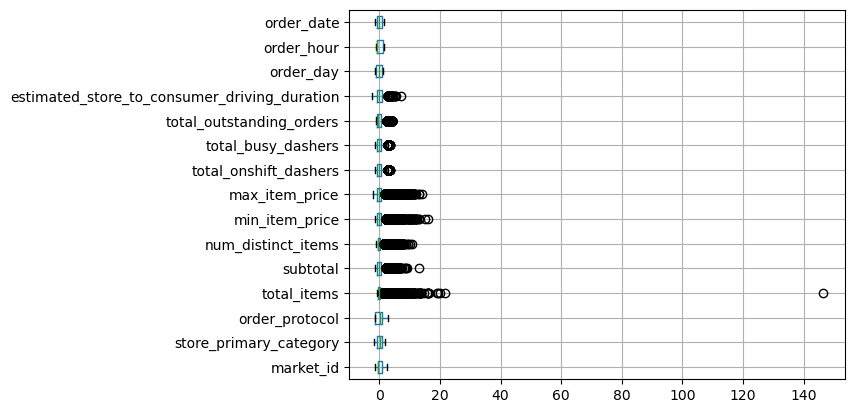

In [99]:
pd.DataFrame(X_train, columns=df_copy.columns).boxplot(vert=False)

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [108]:
model = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],), name='hidden_layer_1'),
                    Dense(32, activation='relu', name='hidden_layer_2'),
                    Dense(1, activation=None, name='output_layer')])

In [109]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

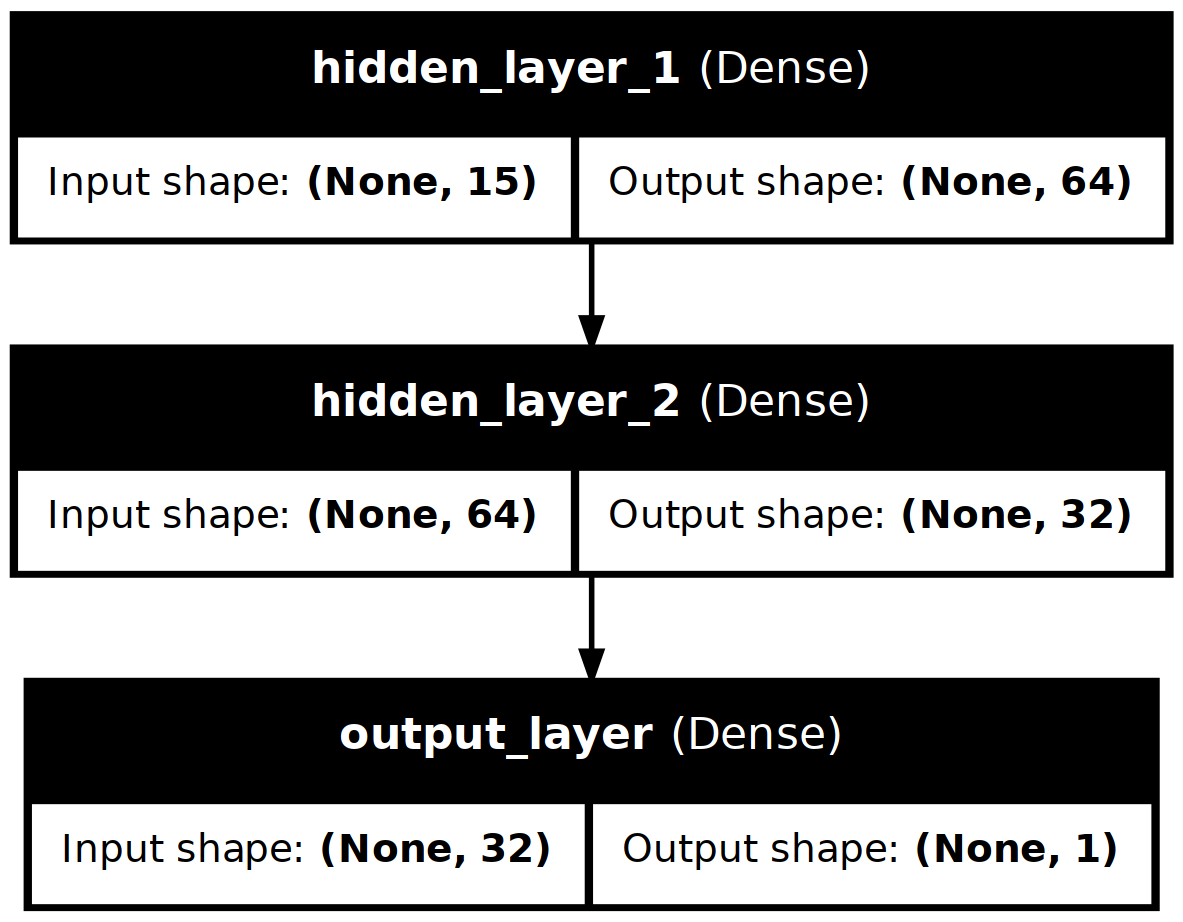

In [111]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='Porter_NN_model.png', show_shapes=True, show_layer_names=True)

In [114]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

In [115]:
model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.1, verbose=1)

Epoch 1/100


I0000 00:00:1750084041.561312   18559 service.cc:152] XLA service 0x71e9f4005ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750084041.561362   18559 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2025-06-16 19:57:21.594153: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750084041.731732   18559 cuda_dnn.cc:529] Loaded cuDNN version 90300


 75/396 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7980616.0000 - mae: 2770.1411 

I0000 00:00:1750084042.434761   18559 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7493948.0000 - mae: 2676.7468 - val_loss: 2366158.2500 - val_mae: 1456.4451
Epoch 2/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1277880.0000 - mae: 960.3170 - val_loss: 401178.0312 - val_mae: 489.1905
Epoch 3/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 388333.2812 - mae: 465.0785 - val_loss: 258316.9688 - val_mae: 382.4081
Epoch 4/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264702.8750 - mae: 368.2777 - val_loss: 177082.1875 - val_mae: 314.3436
Epoch 5/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 193298.3594 - mae: 303.8507 - val_loss: 127328.4375 - val_mae: 268.1240
Epoch 6/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 124822.0703 - mae: 261.5931 - val_loss: 94732.8984 - val_mae: 233.0192
Epoch 7/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 97134.1797 - mae: 227.0101 - val_loss: 72613.4375 - val_mae: 205.8515
Epoch 8/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 82126.2656 - mae: 